In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans
import prince

# Artigo WCDE 2017 

https://sites.google.com/view/wcde/p%C3%A1gina-inicial?authuser=0 

Autores: 
- Thiago Medeiros Barros
- Luiz Affonso Guedes

Título: 
- Análise de Desempenho de Alunos Baseada em Técnicas de Modelagem e Visualização Científica de Dados
- ou Modelagem e Visualização Científica de Dados Educacionais: Estudo de Caso de Desempenho de Alunos em Cursos a Distância

Resumo: a partir das técnicas de visualização do gráfico violino, plot Q-Q e análise de correspondência é verificado que a distribuição de notas de uma dada disciplina não segue uma normal, mas sim uma distribuição bi-modal que pode ser divididas em duas normais 

Dados já foram limpos com um total de 34799 instância com 44 atributos, sendo eles: 
'aluno_exclusivo_rede_publica', 'aluno_id', 'ano_letivo__ano',
       'ano_letivo__ano_aluno', 'categorias', 'cep', 'ch_hora_relogio',
       'codigo_censup', 'codigo_siape', 'descricao', 'descricao_afastamento',
       'descricao_area_residencial', 'descricao_companhia_domiciliar',
       'descricao_estado_civil', 'descricao_historico', 'descricao_imovel',
       'descricao_internet', 'descricao_mae_escolaridade',
       'descricao_pai_escolaridade', 'descricao_raca',
       'descricao_responsavel_escolaridade',
       'descricao_responsavel_financeiro', 'descricao_saude',
       'descricao_situacao_disciplina', 'descricao_situacao_matricula',
       'descricao_trabalho', 'descricao_trabalho_responsavel',
       'ensino_fundamental_conclusao', 'ficou_tempo_sem_estudar',
       'inativo_siape', 'local_acesso_internet', 'media_final',
       'nome_escola_ensino_fundamental', 'nome_escola_ensino_medio',
       'percentual_frequencia', 'periodo_letivo',
       'pessoa_fisica__nascimento_data', 'possui_necessidade_especial',
       'qnt_pc', 'qtd_filhos', 'qtd_pessoas_domicilio',
       'quantidade_smartphones', 'renda_bruta_familiar', 'tempo_sem_estudar''

In [2]:
dados = pd.read_json('dadoslimpos.json')

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [14]:
#dados.head

É exibido a distribuição das notas em uma disciplina a partir do gráfico violino (https://en.wikipedia.org/wiki/Violin_plot) e realizado o teste estatístico Q-Q (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html, https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) se a distribuição se comporta como uma Normal.

A partir dos gráficos abaixo é verificado que as notas não seguem uma distribuição normal, mas, aparentemente, uma distribuição bimodal. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


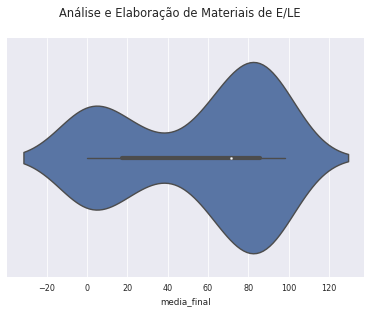

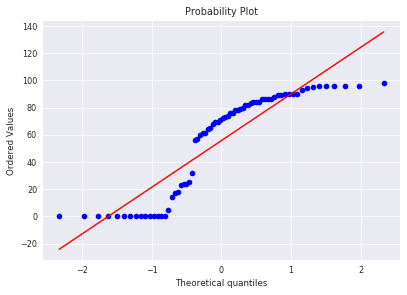

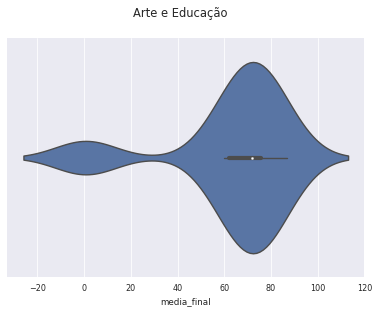

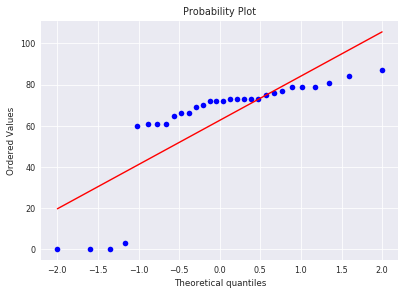

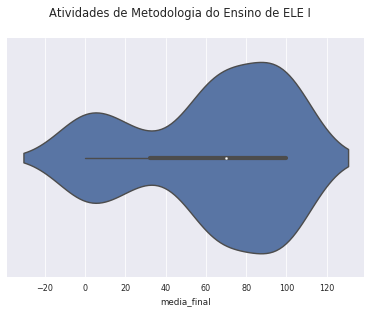

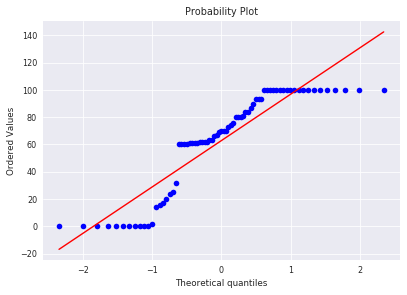

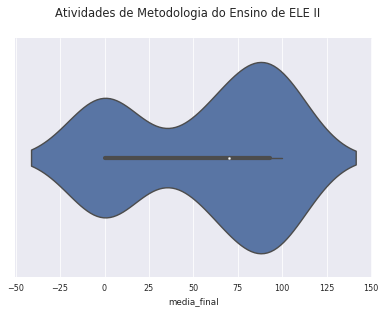

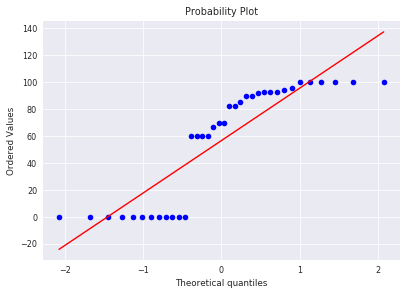

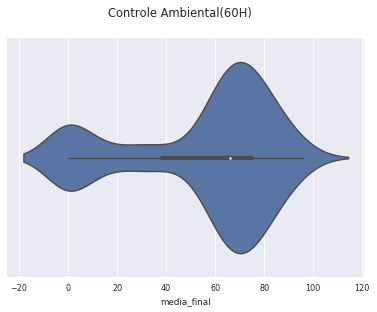

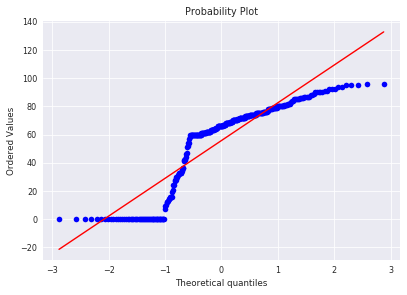

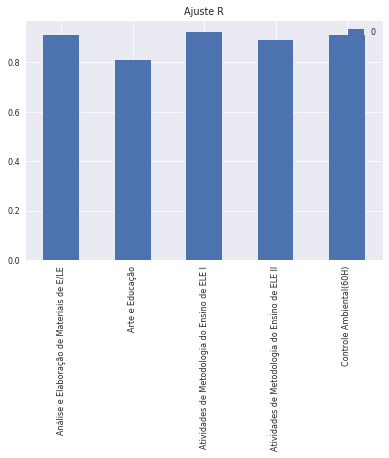

In [4]:
#gerando graficos
%matplotlib inline
sns.set_context("paper")

plt.close('all')

cnt = 0

#array para guardar o R o qual representa o erro do ajuste com a Normal. Quanto mais próximo de 1, mais próximo está da normal
r = []
i = []

#loop sobre cada disciplina
for index1, group1 in dados.groupby(['descricao_historico']):    
    
    #restrição mínima de 10 instâncias  
    if dados[dados.descricao_historico == index1]['media_final'].count() < 10:
        continue
    
    
    fig = plt.figure()
    sns.plt.suptitle(index1)
    #sns.violinplot(dados[dados.descricao_historico == index1]['media_final'], inner="points")
    #sns.violinplot(dados[dados.descricao_historico == index1]['media_final'], inner="quart")
    sns.violinplot(dados[dados.descricao_historico == index1]['media_final'])
    fig.savefig("violino1.pdf", dpi=600)
    
    fig = plt.figure()
    o, res = stats.probplot(dados[dados.descricao_historico == index1]['media_final'], plot=plt)    
    r.append(res[2])
    i.append(index1)
    fig.savefig("qq1.pdf", dpi=600)
    
    cnt += 1
    if cnt == 5:
        break

df = pd.DataFrame(data=r, index=i)

fig = plt.figure()
df.plot.bar(title='Ajuste R')

É realizado a clusterização utilizando k-means por disciplina em dois grupos (provavelmente alunos aprovado e reprovados). 
É criado dentro do frame um novo atributo chamado 'classe_disciplina', o qual identifica a qual grupo aquele aluno pertence. Para cada grupo é realizado o plot Q-Q, a fim de verificar se é a distribuição segue uma normal. O resultado do ajuste de reta definido pelo R é plotado ao final. 

É verificado um melhor ajuste na classe que possivelmente representa os "Aprovados" a classe com os alunos que possuem notas menores. Um possível motivo pode ser a quantidade de aluno com notas zeros. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/ubuntu/an

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


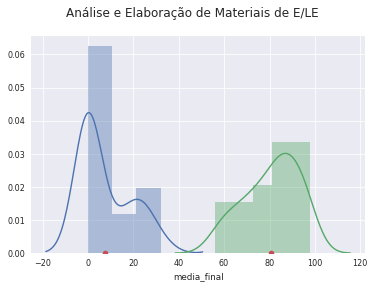

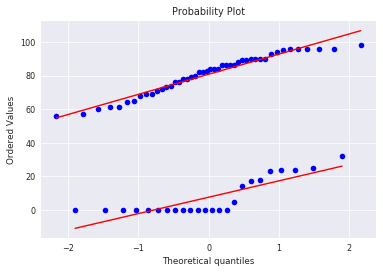

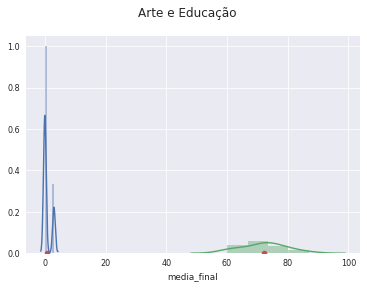

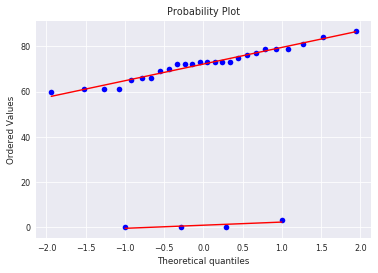

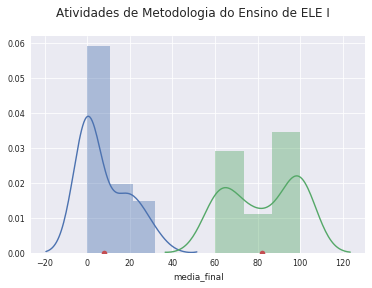

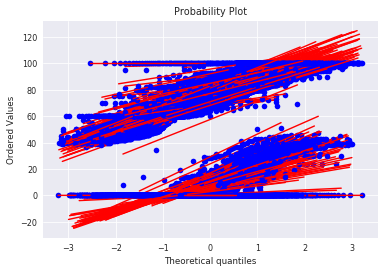

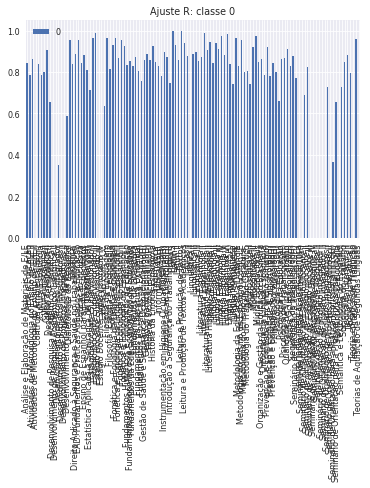

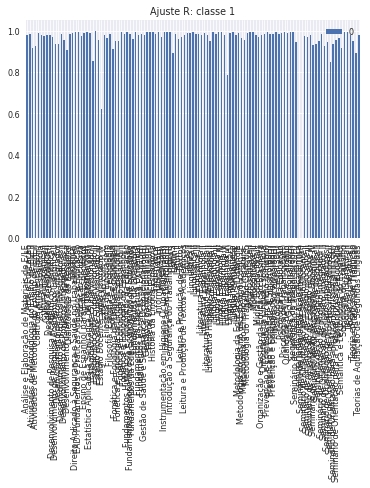

In [7]:
%matplotlib inline
plt.close('all')

#cria coluna 'classe' no frame dados inicializado com -1, a fim de controle
dados['classe_disciplina'] = np.ones(dados.shape[0])*-1

#definir linha que divide os clusters
cnt = 0
r1 = []
r2 = []
i = []

for index1, group1 in dados.groupby(['descricao_historico']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = dados[dados.descricao_historico == index1]['media_final']
    
    #restrição mínima de 10 instâncias  
    if data.count() < 10:
        continue
    
    #recuperando os clusters
    cluster = KMeans(n_clusters=2, init=np.array([[0], [10]]))
    cluster.fit(data.reshape(-1,1))
    #print(cluster.cluster_centers_)
        
    #atribuindo a classe
    dados.loc[dados.descricao_historico == index1, 'classe_disciplina'] = cluster.predict(data.reshape(-1,1))
    
    #controle para exibir os gráficos
    if cnt < 3:    
        #figura mostrando a clusterizacao
        fig = plt.figure()
        sns.plt.suptitle(index1)
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'] )
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'] )
        plt.plot(cluster.cluster_centers_, [0, 0], "o")
        #fig.savefig("kmeans.pdf", dpi=600)

        #figura mostrando o ajuste dos dados aos clusters
        fig = plt.figure()

    o, res1 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'], plot=plt)
    o, res2 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'], plot=plt)
    
    #fig.savefig("qq2.pdf", dpi=600)
    
    r1.append(res1[2])
    r2.append(res2[2])
    i.append(index1)
    
    cnt += 1
    
    #break

df = pd.DataFrame(data=r1, index=i)
fig = plt.figure()
df.plot.bar(title='Ajuste R: classe 0')

df = pd.DataFrame(data=r2, index=i)
fig = plt.figure()
df.plot.bar(title='Ajuste R: classe 1')

Abaixo é exibido a tabela de contigência entre o atributo "situação da disciplina" e a classe atribuída pelo kmeans. É verificado, como já esperado, uma concentração de aluno aprovados no grupo 1 e uma concentração de alunos reprovados no grupo 0. As instâncias com classe_disciplina = -1 são aquelas que pertecem a disciplina com menos de 10 instâncias.

In [8]:
dados_filt = dados[dados.classe_disciplina != -1]

tbl = pd.crosstab(index = dados_filt.descricao_situacao_disciplina , columns = dados_filt.classe_disciplina, margins=True)
tbl

classe_disciplina,0.0,1.0,All
descricao_situacao_disciplina,,,
Aprovado,1168,22221,23389
Aprovado/Reprovado no Módulo,46,118,164
Cancelado,292,1,293
Dispensado,2,0,2
Pendente,1,0,1
Reprovado,8672,1524,10196
Reprovado por falta,14,0,14
Trancado,189,1,190
Transferido,3,0,3


Uma situação inusitada foi aprovados com classe 0. A partir da análise mostrado abaixo é verificado que esses casos ocorreu em duas situações:
- a disciplina só tinha uma única nota (zero)
- a disciplina tinha praticamente todas suas notas acima da média

In [9]:
dados_filt[(dados_filt.classe_disciplina == 0) & (dados_filt.descricao_situacao_disciplina == 'Aprovado')].groupby('descricao_historico')[['media_final']].count()

,media_final
descricao_historico,
Desenvolvimento de Projetos de Pesquisa,19
Estágio Docente Supervisionado I,19
Estágio Docente Supervisionado II,11
Estágio Docente Supervisionado IV,3
Fonética e Fonologia,4
Fonética e Fonologia da Língua Espanhola I,10
LIBRAS,2
Leitura e Produção de Textos,2
Língua Espanhola VI,31


In [10]:
print(dados_filt[dados_filt.descricao_historico == 'Seminário de Integração Acadêmica(10H)'][['media_final']])
print(dados_filt[dados_filt.descricao_historico == 'Desenvolvimento de Projetos de Pesquisa'][['media_final']])
print(dados_filt[dados_filt.descricao_historico == 'Estágio Docente Supervisionado II'][['media_final']])


       media_final
1000             0
10003            0
10034            0
10054            0
10070            0
10164            0
10181            0
10197            0
10205            0
10231            0
10247            0
10291            0
10300            0
10301            0
10315            0
10338            0
10345            0
10347            0
10371            0
10457            0
10471            0
10504            0
10524            0
10533            0
10543            0
10584            0
10611            0
10631            0
10654            0
10680            0
...            ...
9371             0
9402             0
9411             0
9419             0
9478             0
9490             0
9496             0
9529             0
954              0
9569             0
9593             0
9615             0
9623             0
9643             0
9677             0
9699             0
9717             0
9743             0
9753             0
9764             0
9814        

A fim de ter uma representação gráfica mais interessante, é feito a Análise de Correspondência a fim de visualizar a similaridade entre os atributos.
https://github.com/MaxHalford/Prince/blob/master/examples/CA%20-%20Hair%20color%20and%20eye%20color.ipynb 

In [11]:
ca = prince.CA(tbl, n_components=-1)

(<matplotlib.figure.Figure at 0x7f7cd4fe8e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7cd4fe5eb8>)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


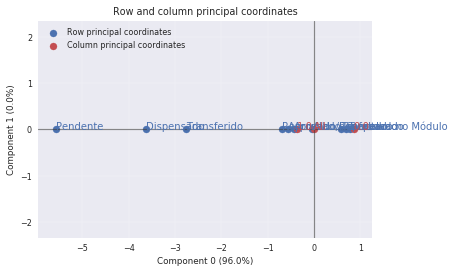

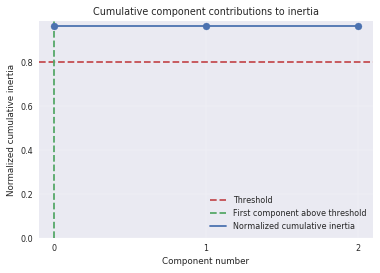

In [12]:
%matplotlib inline

#axes deve ser colocado com "[]"! SE for colocado com () DÁ ERRO
ca.plot_rows_columns(axes=[0, 1] ,show_row_labels=True, show_column_labels=True)

fig = plt.figure()
ca.plot_cumulative_inertia()

In [13]:
#dados.groupby('descricao_situacao_disciplina')['descricao_situacao_disciplina'].count()

dados_clean = dados_filt.groupby('descricao_situacao_disciplina').filter(lambda x: len(x) > 189)
dados_clean.groupby('descricao_situacao_disciplina')['descricao_situacao_disciplina'].count()
tbl = pd.crosstab(index = dados_clean.descricao_situacao_disciplina , columns = dados.classe_disciplina)
tbl

classe_disciplina,0.0,1.0
descricao_situacao_disciplina,,
Aprovado,1168,22221
Cancelado,292,1
Reprovado,8672,1524
Trancado,189,1


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(<matplotlib.figure.Figure at 0x7f7cd3368b38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7cd32b6a90>)

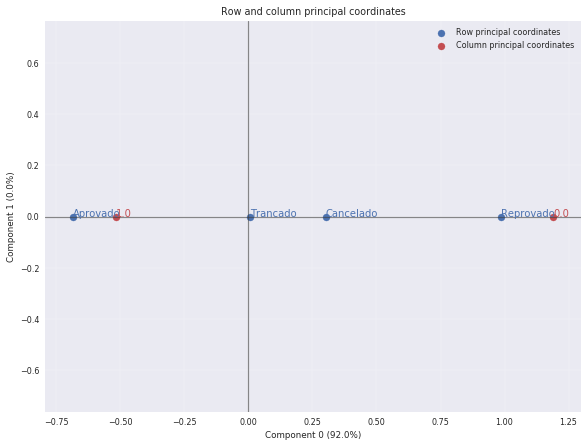

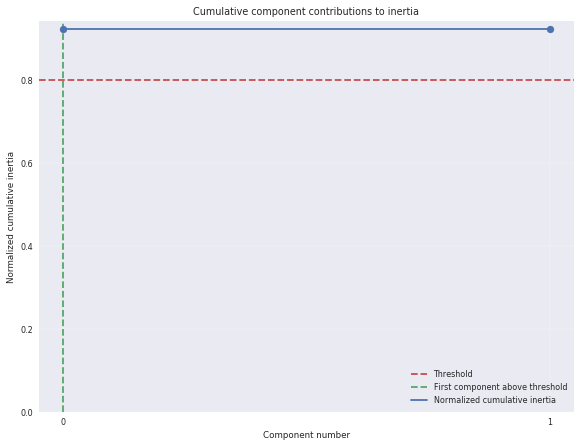

In [20]:
ca = prince.CA(tbl, n_components=-1)

#fig = plt.figure()
fig, ax = ca.plot_rows_columns(axes=[0, 1] ,show_row_labels=True, show_column_labels=True)
fig.savefig("AC.pdf", dpi=600)

#fig = plt.figure()
ca.plot_cumulative_inertia()